In [19]:
import pandas as pd

# Define the path to the CSV file
file_path = 'C:/Users/aswin/OneDrive/Documents/XSS_detection/XSS_dataset.csv'

# Read the CSV file into a DataFrame
df1= pd.read_csv(file_path)

# Display the first few rows of the DataFrame
# print(df.head())
print(df1.head())

   Unnamed: 0                                           Sentence  Label
0           0  <li><a href="/wiki/File:Socrates.png" class="i...      0
1           1               <tt onmouseover="alert(1)">test</tt>      1
2           2  \t </span> <span class="reference-text">Steeri...      0
3           3  \t </span> <span class="reference-text"><cite ...      0
4           4  \t </span>. <a href="/wiki/Digital_object_iden...      0


In [20]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
# Define the path to the CSV file
file_path = 'C:/Users/aswin/OneDrive/Documents/XSS_detection/results.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path,sep="\t")

# Display the first few rows of the DataFrame
# print(df.head())
print(df['Payload'].head())

0    "<li><a href=""/wiki/File:Socrates.png"" class...
1               <tt onmouseover=""alert(1)"">test</tt>
2    \t </span> <span class=""reference-text"">Stee...
3    \t </span> <span class=""reference-text""><cit...
4    \t </span>. <a href=""/wiki/Digital_object_ide...
Name: Payload, dtype: object


In [21]:
sum(df1['Label']==1)


7373

In [22]:
df1['Check'] =0

In [23]:
for i in range (len(df['Status code'])):
    if df['Status code'][i]!=200:
        df1['Check'][i]=0
    else:
        df1['Check'][i]=1


In [24]:
for i in range(len(df1['Check'])):
        if df1['Check'][i]==1 and df1['Label'][i]==0:
                df1['Check'][i]=0



In [25]:
sum(df1['Check']==0)

7699

In [26]:
texts=df1['Sentence'].values
labels=df1['Check'].values

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input
import matplotlib.pyplot as plt
import numpy as np

max_words = 10000  # Adjust based on your needs
max_sequence_length = 100  # Adjust based on your needs

tokenizer = Tokenizer(num_words=max_words,char_level=True)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_sequence_length)

y=labels# Convert labels to categorical format (if multi-class classification)
#y = to_categorical(labels)  # If binary classification, use labels directly

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

In [28]:
model = Sequential()
model.add(Input(shape=(max_sequence_length,)))  # Flatten the input
model.add(Dense(256,activation='relu'))
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))                   # Dropout for regularization
model.add(Dense(64, activation='relu'))   # Another fully connected layer
model.add(Dropout(0.5))                   # Additional dropout
model.add(Dense(32, activation='relu'))   # Further dense layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

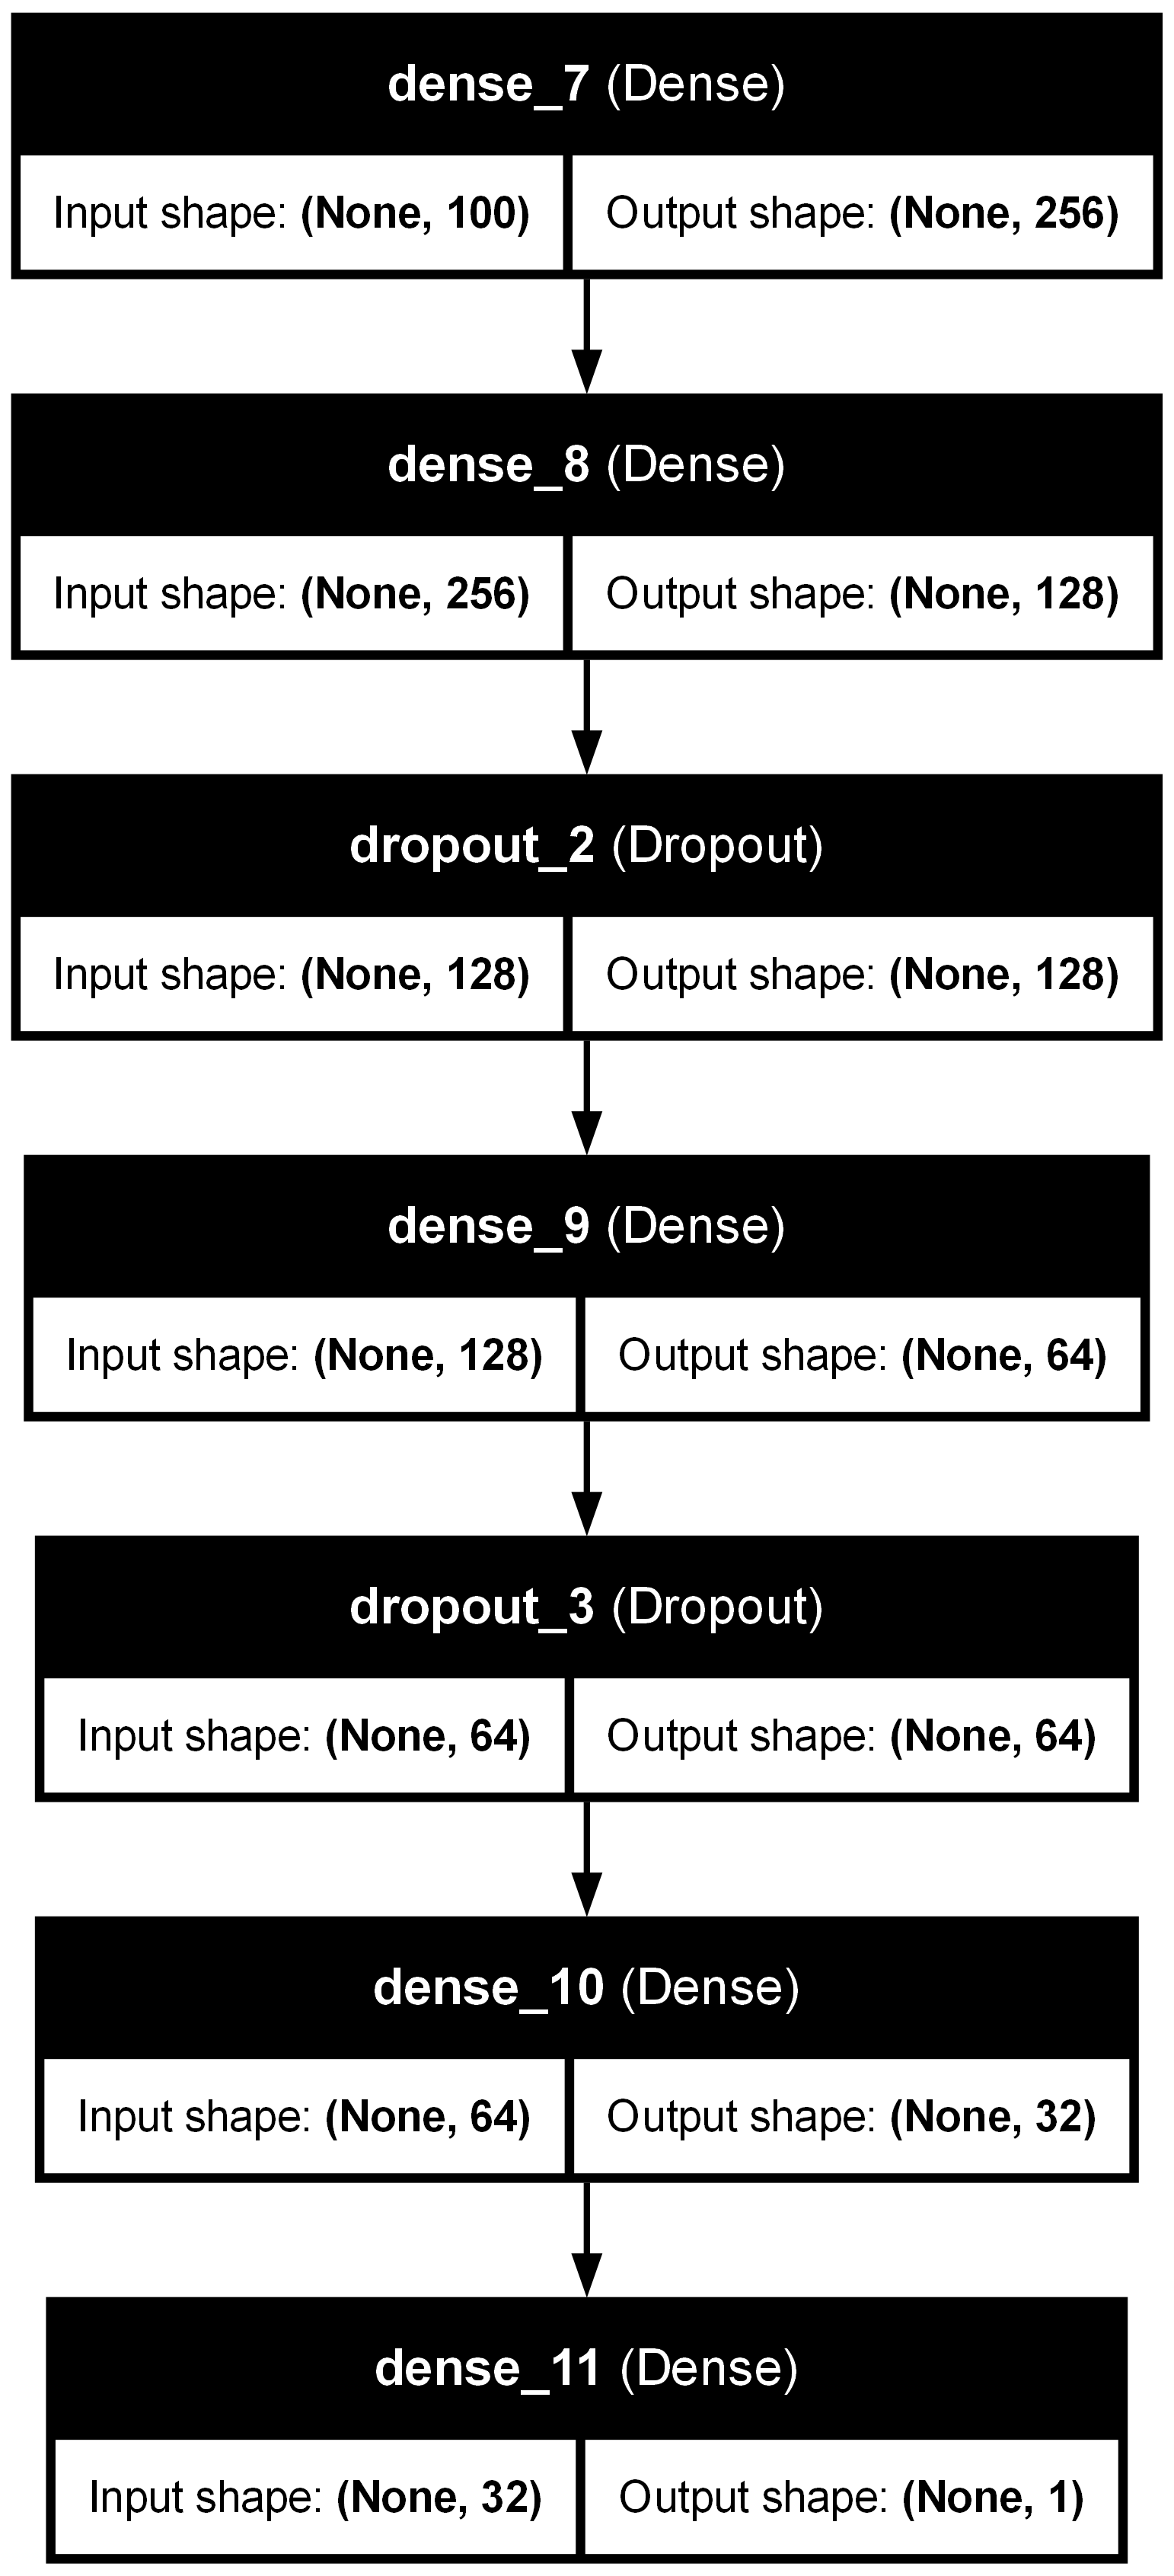

In [29]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=300)



Epoch 1/25


240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8935 - loss: 0.2611 - val_accuracy: 0.8810 - val_loss: 0.3415
Epoch 2/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.9019 - loss: 0.2435 - val_accuracy: 0.8794 - val_loss: 0.3322
Epoch 3/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8924 - loss: 0.2613 - val_accuracy: 0.8695 - val_loss: 0.3543
Epoch 4/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8996 - loss: 0.2515 - val_accuracy: 0.8779 - val_loss: 0.3693
Epoch 5/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8980 - loss: 0.2462 - val_accuracy: 0.8773 - val_loss: 0.3291
Epoch 6/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9048 - loss: 0.2427 - val_accuracy: 0.8820 - val_loss: 0.3362
Epoch 7/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9089 - loss: 0.2314 - val_accuracy: 0.8753 - val_loss: 0.3398
Epoch 8/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9013 - loss: 0.2393 - val_accuracy: 0.8627 - va

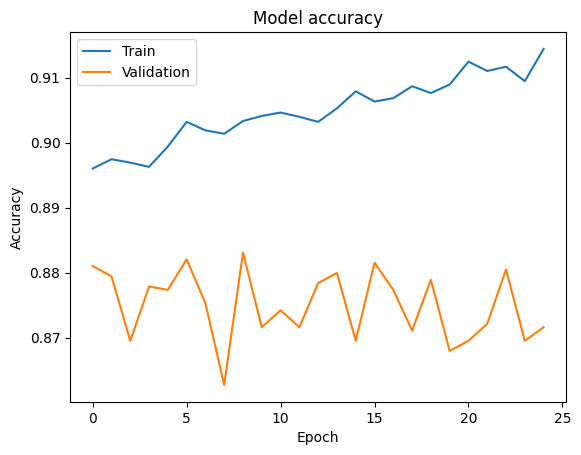

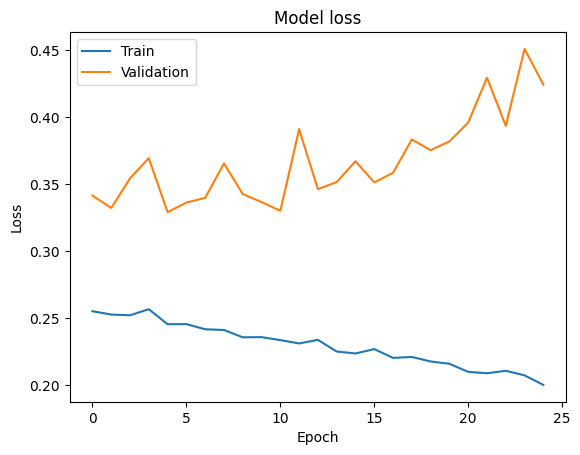

In [31]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
df1.head()

,Unnamed: 0,Sentence,Label,Check
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0,0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1,1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0,0
3,3,"\t </span> <span class=""reference-text""><cite ...",0,0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0,0


In [ ]:
from sklearn.metrics import classification_report
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  

# Print the classification report
print(classification_report(y_test, y_pred_classes))


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2255
           1       0.79      0.96      0.87      1851

    accuracy                           0.87      4106
   macro avg       0.87      0.87      0.87      4106
weighted avg       0.88      0.87      0.87      4106



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding, TimeDistributed
from tensorflow.keras.preprocessing.sequence import pad_sequences

url_encodings = {
    '<': '%3C', '>': '%3E', '"': '%22', "'": '%27', ' ': '%20', '#': '%23', 
    '%': '%25', ';': '%3B', '(': '%28', ')': '%29', '&': '%26', '+': '%2B'
}
def apply_perturbations(payload, encoding_dict, encoding_prob=0.5):
    perturbed_payload = ''.join(
        encoding_dict.get(char, char) if tf.random.uniform([]) < encoding_prob else char
        for char in payload
    )
    return perturbed_payload
def perturb_payload(payload, encodings=url_encodings):
    return ''.join(encodings.get(c, c) for c in payload)
malicious_samples = df1[df1['Check'] == 1]
payloads = malicious_samples['Sentence'].apply(lambda x: perturb_payload(x)).values
perturbed_payloads = [apply_perturbations(payload, url_encodings) for payload in payloads]

# Determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding

# Define a character-level RNN model for sequence generation
model1 = tf.keras.Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_sequence_length),
    LSTM(128, return_sequences=True),
    LSTM(128, return_sequences=True),
    TimeDistributed(Dense(vocab_size, activation='softmax'))  # Output matches sequence length
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Prepare data (tokenize and pad payloads as sequences)
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(payloads)
sequences = tokenizer.texts_to_sequences(payloads)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Shift the target data by one position to predict the next character
input_sequences = padded_sequences[:, :-1]  # All characters except the last one
target_sequences = padded_sequences[:, 1:]  # All characters except the first one
target_sequences = target_sequences[..., None]  # Expand dims to match model's output shape

# Train the model on payload sequences
model1.fit(input_sequences, target_sequences, epochs=10, batch_size=64)

# Function to perturb generated payloads with URL encoding
def apply_url_encoding(payload, encoding_dict, encoding_prob=0.5):
    perturbed_payload = ''
    for char in payload:
        if char in encoding_dict and np.random.rand() < encoding_prob:
            perturbed_payload += encoding_dict[char]  # Replace with encoded value
        else:
            perturbed_payload += char  # Keep the original character
    return perturbed_payload

# Function to generate and perturb new sequences
def generate_payload(seed_text, num_chars=100):
    for _ in range(num_chars):
        tokenized_seed = tokenizer.texts_to_sequences([seed_text])[0]
        tokenized_seed = pad_sequences([tokenized_seed], maxlen=max_sequence_length, padding='post')
        
        
        # Predict the next character for the input sequence
        prediction = model1.predict(tokenized_seed)
        predicted_char_index = prediction[:, -1].argmax(axis=-1)[0]  # Get the last timestep prediction
        
        # Retrieve the predicted character
        predicted_char = tokenizer.index_word.get(int(predicted_char_index), '')
        seed_text += predicted_char
    
    # Apply URL encoding to the generated payload
    return apply_url_encoding(seed_text, url_encodings)

# Generate a perturbed payload



Epoch 1/10


c:\Users\aswin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - loss: 3.1202
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 1.8899
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 1.3326
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 1.0494
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 0.8398
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 0.6792
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 0.5810
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 0.5022
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 0.4479
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 0.4083


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import LSTM, Dense, Embedding, TimeDistributed
from tensorflow.keras.preprocessing.sequence import pad_sequences

# URL encoding dictionary for specific characters
url_encodings = {
    '<': '%3C', '>': '%3E', '"': '%22', "'": '%27', ' ': '%20', '#': '%23', 
    '%': '%25', ';': '%3B', '(': '%28', ')': '%29', '&': '%26', '+': '%2B'
}
expanded_encodings = {
    '<': {
        'url': '%3C', 'html': '&lt;', 'hex': '\\x3C', 
        'unicode': '\\u003C', 'octal': '\\074', 'js_escape': '\\x3C'
    },
    '>': {
        'url': '%3E', 'html': '&gt;', 'hex': '\\x3E', 
        'unicode': '\\u003E', 'octal': '\\076', 'js_escape': '\\x3E'
    },
    '"': {
        'url': '%22', 'html': '&quot;', 'hex': '\\x22', 
        'unicode': '\\u0022', 'octal': '\\042', 'js_escape': '\\x22'
    },
    "'": {
        'url': '%27', 'html': '&#x27;', 'hex': '\\x27', 
        'unicode': '\\u0027', 'octal': '\\047', 'js_escape': '\\x27'
    },
    ' ': {
        'url': '%20', 'html': '&nbsp;', 'hex': '\\x20', 
        'unicode': '\\u0020', 'octal': '\\040', 'js_escape': '\\x20'
    },
    '#': {
        'url': '%23', 'html': '&#35;', 'hex': '\\x23', 
        'unicode': '\\u0023', 'octal': '\\043', 'js_escape': '\\x23'
    },
    '%': {
        'url': '%25', 'html': '&#37;', 'hex': '\\x25', 
        'unicode': '\\u0025', 'octal': '\\045', 'js_escape': '\\x25'
    },
    ';': {
        'url': '%3B', 'html': '&#59;', 'hex': '\\x3B', 
        'unicode': '\\u003B', 'octal': '\\073', 'js_escape': '\\x3B'
    },
    '(': {
        'url': '%28', 'html': '&#40;', 'hex': '\\x28', 
        'unicode': '\\u0028', 'octal': '\\050', 'js_escape': '\\x28'
    },
    ')': {
        'url': '%29', 'html': '&#41;', 'hex': '\\x29', 
        'unicode': '\\u0029', 'octal': '\\051', 'js_escape': '\\x29'
    },
    '&': {
        'url': '%26', 'html': '&amp;', 'hex': '\\x26', 
        'unicode': '\\u0026', 'octal': '\\046', 'js_escape': '\\x26'
    },
    '+': {
        'url': '%2B', 'html': '&#43;', 'hex': '\\x2B', 
        'unicode': '\\u002B', 'octal': '\\053', 'js_escape': '\\x2B'
    },
    '/': {
        'url': '%2F', 'html': '&#47;', 'hex': '\\x2F', 
        'unicode': '\\u002F', 'octal': '\\057', 'js_escape': '\\x2F'
    },
    '=': {
        'url': '%3D', 'html': '&#61;', 'hex': '\\x3D', 
        'unicode': '\\u003D', 'octal': '\\075', 'js_escape': '\\x3D'
    },
    '?': {
        'url': '%3F', 'html': '&#63;', 'hex': '\\x3F', 
        'unicode': '\\u003F', 'octal': '\\077', 'js_escape': '\\x3F'
    }
}# Expanded encoding dictionary with multiple encoding techniques


# Function to apply perturbations with a given probability
# def apply_perturbations(payload, encoding_dict, encoding_prob=0.5):
#     perturbed_payload = ''.join(
#         encoding_dict.get(char, char) if np.random.rand() < encoding_prob else char
#         for char in payload
#     )
#     return perturbed_payload

def apply_perturbations(payload, encoding_dict, encoding_prob=0.5):
    # Randomly select an encoding type for the entire payload
    encoding_type = np.random.choice(list(next(iter(encoding_dict.values())).keys()))  # Select an encoding type (e.g., 'url', 'html', etc.)
    
    perturbed_payload = []
    
    for char in payload:
        # Check if character has encoding options in the dictionary
        if char in encoding_dict and np.random.rand() < encoding_prob:
            # Use the chosen encoding type for the entire payload
            perturbed_payload.append(encoding_dict[char].get(encoding_type, char))  # Ensure using the correct encoding type for the character
        else:
            # If not encoding or character is not in the dictionary, keep it as is
            perturbed_payload.append(char)
    
    return ''.join(perturbed_payload)



# Filter and perturb payloads in the dataset
malicious_samples = df1[df1['Check'] == 1]
payloads = malicious_samples['Sentence'].apply(
    lambda x: apply_perturbations(x, expanded_encodings)
).values

# Tokenize the payloads
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(payloads)
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size including padding
max_sequence_length = 100

# Prepare data by tokenizing and padding payloads
sequences = tokenizer.texts_to_sequences(payloads)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Prepare input and target sequences for training
input_sequences = padded_sequences[:, :-1]  
target_sequences = padded_sequences[:, 1:]  
target_sequences = target_sequences[..., None]  # Expand dims for model output

# Define the RNN model
model1 = tf.keras.Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_sequence_length - 1),
    LSTM(128, return_sequences=True),
    LSTM(128, return_sequences=True),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

# Define optimizer and loss function
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Custom training loop
epochs = 10
batch_size = 64
dataset = tf.data.Dataset.from_tensor_slices((input_sequences, target_sequences)).batch(batch_size)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step, (x_batch, y_batch) in enumerate(dataset):
        
        # Apply perturbations conditionally within the custom training loop
        x_batch_perturbed = np.array([
            apply_perturbations(''.join(tokenizer.index_word.get(idx, '') for idx in seq), expanded_encodings)
            for seq in x_batch.numpy()
        ])
        
        # Convert perturbed batch back to sequences
        x_batch_perturbed = tokenizer.texts_to_sequences(x_batch_perturbed)
        x_batch_perturbed = pad_sequences(x_batch_perturbed, maxlen=max_sequence_length - 1, padding='post')

        with tf.GradientTape() as tape:
            # Forward pass: get predictions for perturbed inputs
            predictions = model1(x_batch_perturbed, training=True)
            loss = loss_fn(y_batch, predictions)

        # Backward pass: calculate gradients and update weights
        gradients = tape.gradient(loss, model1.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model1.trainable_variables))

        if step % 10 == 0:
            print(f"Step {step}, Loss: {loss.numpy():.4f}")

print("Training completed.")

Epoch 1/10
Step 0, Loss: 4.3566
Step 10, Loss: 3.2892
Step 20, Loss: 3.1557
Step 30, Loss: 2.8926
Step 40, Loss: 2.7842
Step 50, Loss: 2.8570
Step 60, Loss: 2.6687
Step 70, Loss: 2.6385
Step 80, Loss: 2.7484
Step 90, Loss: 2.8110
Epoch 2/10
Step 0, Loss: 2.7251
Step 10, Loss: 2.6395
Step 20, Loss: 2.7771
Step 30, Loss: 2.6762
Step 40, Loss: 2.7014
Step 50, Loss: 2.7669
Step 60, Loss: 2.5433
Step 70, Loss: 2.5235
Step 80, Loss: 2.6599
Step 90, Loss: 2.7267
Epoch 3/10
Step 0, Loss: 2.6232
Step 10, Loss: 2.5824
Step 20, Loss: 2.6598
Step 30, Loss: 2.6117
Step 40, Loss: 2.5598
Step 50, Loss: 2.6540
Step 60, Loss: 2.4761
Step 70, Loss: 2.4660
Step 80, Loss: 2.5751
Step 90, Loss: 2.6495
Epoch 4/10
Step 0, Loss: 2.5425
Step 10, Loss: 2.4784
Step 20, Loss: 2.6011
Step 30, Loss: 2.5033
Step 40, Loss: 2.5013
Step 50, Loss: 2.5723
Step 60, Loss: 2.4235
Step 70, Loss: 2.3998
Step 80, Loss: 2.5292
Step 90, Loss: 2.5956
Epoch 5/10
Step 0, Loss: 2.4615
Step 10, Loss: 2.4544
Step 20, Loss: 2.5428
Step

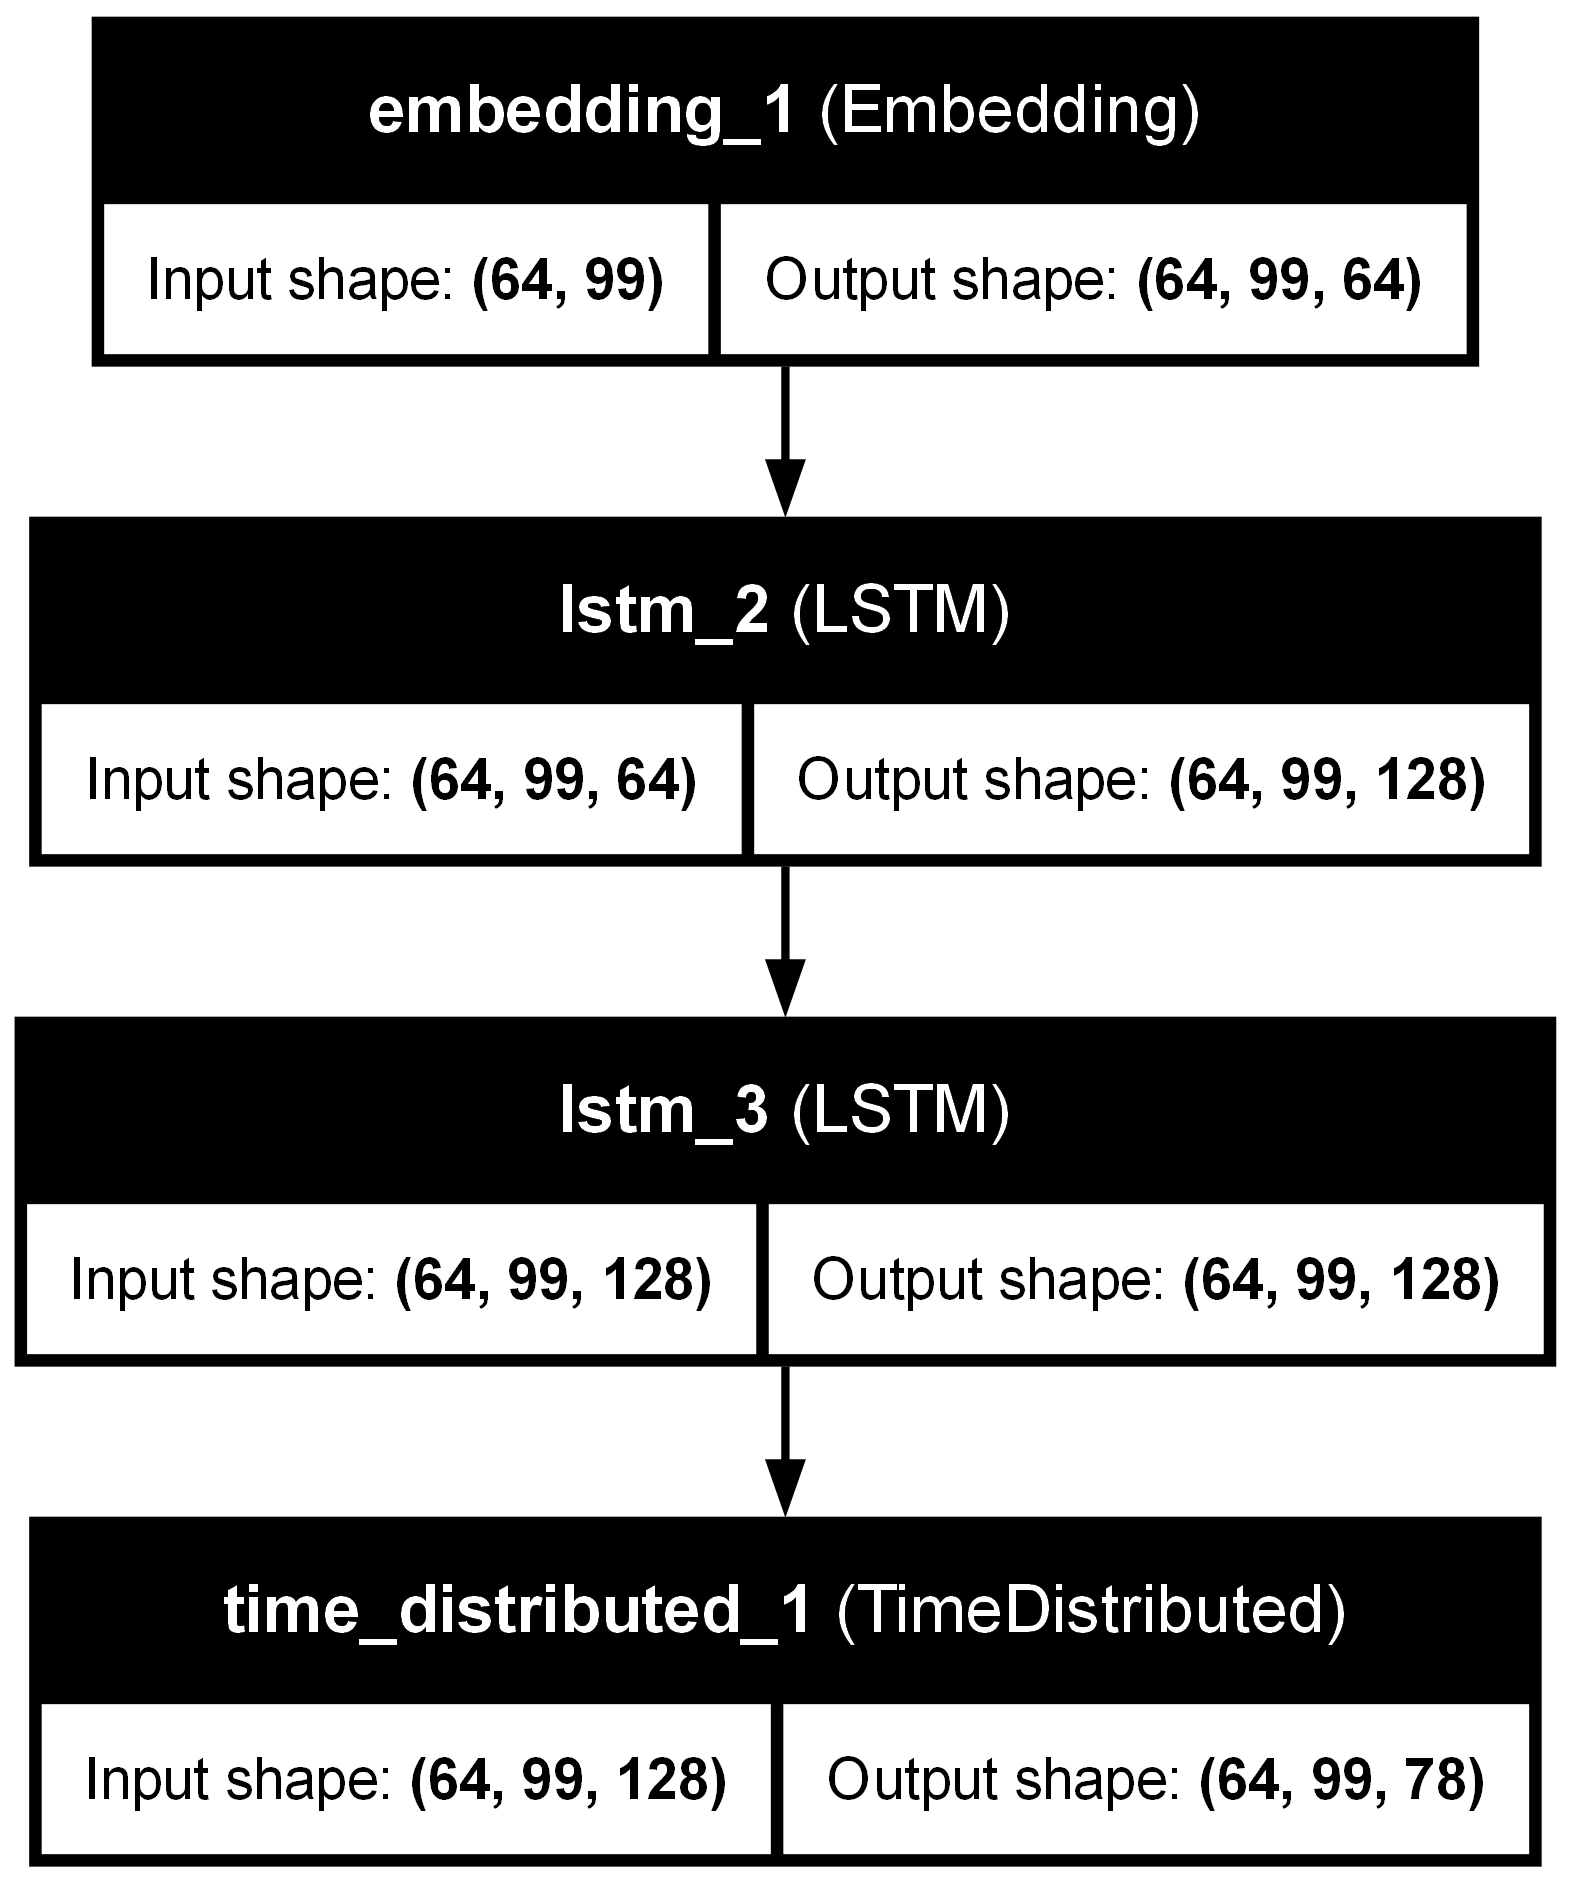

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model1, to_file='model1_architecture.png', show_shapes=True, show_layer_names=True, dpi=300)



In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Filter original payloads for those with Label == 1
malicious_payloads = df1[df1['Check'] == 1]['Sentence'].values  # Only payloads with Label == 1
vocab_size = model1.layers[0].input_dim  # Embedding layer's input dimension

# Initialize tokenizer for character-level processing
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, char_level=True)
tokenizer.fit_on_texts(malicious_payloads)

# Define max sequence length and batch size for faster processing
max_sequence_length = 100
batch_size = 64  # Use a batch size suitable for your hardware

# Function to filter out-of-vocabulary indices
def filter_oov_indices(sequence, vocab_size):
    return [index if index < vocab_size else 0 for index in sequence]  # Use 0 for OOV

# Function to generate perturbed payloads in batches
def generate_perturbed_payloads(payloads, model, tokenizer, encoding_dict, sequence_length=100, encoding_prob=0.9):
    perturbed_payloads = []

    for start_idx in range(0, len(payloads), batch_size):
        # Batch processing
        batch_payloads = payloads[start_idx:start_idx + batch_size]
        batch_seed_texts = [payload[:sequence_length] for payload in batch_payloads]

        for i in range(sequence_length - max(len(text) for text in batch_seed_texts)):
            # Convert batch of seed texts to sequences
            tokenized_seeds = [filter_oov_indices(tokenizer.texts_to_sequences([seed])[0], vocab_size) for seed in batch_seed_texts]
            tokenized_seeds = pad_sequences(tokenized_seeds, maxlen=sequence_length, padding='post')

            # Batch prediction for next character
            predictions = model.predict(tokenized_seeds, verbose=0)

            # Update each seed text with the predicted character
            for j, seed_text in enumerate(batch_seed_texts):
                predicted_char_index = predictions[j, -1].argmax()
                predicted_char = tokenizer.index_word.get(predicted_char_index, '')
                batch_seed_texts[j] += predicted_char

        # Apply URL encoding
        for seed_text in batch_seed_texts:
            perturbed_payload = ''.join(
                encoding_dict.get(char, char) if np.random.rand() < encoding_prob else char
                for char in seed_text
            )
            perturbed_payloads.append(perturbed_payload)

    return perturbed_payloads


# Define encoding dictionary (example dictionary; replace with your actual encoding dict)

# Generate perturbed payloads
perturbed_payloads = generate_perturbed_payloads(malicious_payloads, model1, tokenizer, url_encodings, max_sequence_length)

# Add perturbed payloads to the DataFrame
# df1.loc[df1['Label'] == 1, 'Perturbed_Sentence'] = perturbed_payloads

# # Display the DataFrame with the new perturbed column
# print(df1[['Sentence', 'Perturbed_Sentence']].head())


In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to filter out-of-vocabulary indices
def filter_oov_indices(sequence, vocab_size):
    return [index if index < vocab_size else 0 for index in sequence]  # Use 0 for OOV

# Function to generate perturbed payloads in batches with consistent encoding type per payload
def generate_perturbed_payloads(payloads, model, tokenizer, encoding_dict, sequence_length=100, encoding_prob=0.65):
    perturbed_payloads = []

    for start_idx in range(0, len(payloads), batch_size):
        batch_payloads = payloads[start_idx:start_idx + batch_size]
        batch_seed_texts = [payload[:sequence_length] for payload in batch_payloads]

        # Select a consistent encoding type for each payload in the batch
        encoding_types = [np.random.choice(list(next(iter(encoding_dict.values())).keys())) for _ in batch_seed_texts]

        for i in range(sequence_length - max(len(text) for text in batch_seed_texts)):
            tokenized_seeds = [filter_oov_indices(tokenizer.texts_to_sequences([seed])[0], vocab_size) for seed in batch_seed_texts]
            tokenized_seeds = pad_sequences(tokenized_seeds, maxlen=sequence_length, padding='post')
            predictions = model.predict(tokenized_seeds, verbose=0)

            for j, seed_text in enumerate(batch_seed_texts):
                predicted_char_index = predictions[j, -1].argmax()
                predicted_char = tokenizer.index_word.get(predicted_char_index, '')
                batch_seed_texts[j] += predicted_char

        for idx, seed_text in enumerate(batch_seed_texts):
            encoding_type = encoding_types[idx]
            perturbed_payload = ''.join(
                encoding_dict[char][encoding_type] if char in encoding_dict and np.random.rand() < encoding_prob else char
                for char in seed_text
            )
            perturbed_payloads.append(perturbed_payload)

    return perturbed_payloads


malicious_payloads = df1[df1['Check'] == 1]['Sentence'].values 
# Generate perturbed payloads
perturbed_payloads = generate_perturbed_payloads(malicious_payloads, model1, tokenizer, expanded_encodings, max_sequence_length)

def perturb_payload(payload, encodings=expanded_encodings, encoding_type='url'):
    return ''.join(
        encodings.get(c, {}).get(encoding_type, c) if c in encodings else c
        for c in payload
    )

In [44]:
print(perturbed_payloads)

['\\u003Ctt\\u0020onmouseover=\\u0022alert\\u00281)\\u0022\\u003Etest<\\u002Ftt\\u003E', '\\x3Ccol\\x20draggable=\\x22true\\x22\\x20ondragenter\\x3D"alert\\x281\\x29\\x22\\x3Etest<\\x2Fcol\\x3E', '<caption&nbsp;onpointerdown=alert&#40;1&#41;&gt;XSS&lt;&#47;caption&gt;', '\\u003Cstyle\\u0020onmouseleave=\\u0022alert(1\\u0029\\u0022>test\\u003C/style\\u003E', '\\074svg>\\074meta\\040onload\\075alert(1\\051>\\074\\057meta\\076', '<figcaption\\u0020onpointerleave\\u003Dalert\\u00281)>XSS<\\u002Ffigcaption\\u003E', '%3Cdatalist%20id=x tabindex=1%20onfocusin%3Dalert%281)%3E%3C%2Fdatalist%3E', '<input\\040type\\075image\\040src=1\\040onerror=alert\\0501\\051>', '\\x3Cstrong\\x20ondblclick\\x3D\\x22alert\\x281\\x29">test<\\x2Fstrong\\x3E', '<div\\x20draggable\\x3D\\x22true\\x22\\x20contenteditable>drag\\x20me\\x3C/div><input\\x20ondragover\\x3Dalert(1)\\x20contenteditable\\x3Edrop\\x20h', '<style>@keyframes%20slidein%20{}%3C%2Fstyle%3E%3Ccenter%20style%3D%22animation-duration:1s;animation-name

In [45]:
payloads = malicious_samples['Sentence'].apply(lambda x: perturb_payload(x)).values

# Split data into training and testing sets
train_payloads, test_payloads = train_test_split(payloads, test_size=0.3)

In [39]:
def apply_perturbations(payload, encoding_dict, encoding_prob=0.5):
    perturbed_payload = [
        encoding_dict.get(char, char) if tf.random.uniform([]) < encoding_prob else char
        for char in payload
    ]
    return perturbed_payload  # Return as a list of characters

tested_payloads=apply_perturbations(test_payloads,url_encodings)

tested_payloads=np.array(tested_payloads)
print(tested_payloads)

['%3Cbdi%20onpointerout%3Dalert%281%29%3EXSS%3C%2Fbdi%3E'
 '%3Cp%20oncut%3D%22alert%281%29%22%20contenteditable%3Etest%3C%2Fp%3E'
 '%3Coptgroup%20onmouseout%3D%22alert%281%29%22%3Etest%3C%2Foptgroup%3E'
 ...
 '%3Cdiv%20draggable%3D%22true%22%20contenteditable%3Edrag%20me%3C%2Fdiv%3E%3Cb%20ondragover%3Dalert%281%29%20contenteditable%3Edrop%20here%3C%2Fb%3E'
 '%3Cdata%20onmouseenter%3D%22alert%281%29%22%3Etest%3C%2Fdata%3E'
 '%3Ch1%20id%3Dx%20tabindex%3D1%20onbeforedeactivate%3Dalert%281%29%3E%3C%2Fh1%3E%3Cinput%20autofocus%3E']


ONLY URL ENCODING

In [49]:
import pandas as pd
from sklearn.metrics import classification_report

# Step 1: Extract non-malicious samples
non_malicious_samples = df1[df1['Check'] == 0]['Sentence'].values

# Step 2: Create a DataFrame for the perturbed payloads
perturbed_payloads_df = pd.DataFrame(tested_payloads, columns=['Payload'])
# Create a new column for labels (1 for malicious, 0 for non-malicious)
perturbed_payloads_df['Check'] = 1

# Step 3: Create a DataFrame for non-malicious samples
non_malicious_df = pd.DataFrame(non_malicious_samples, columns=['Payload'])
non_malicious_df['Check'] = 0  # Assign label 0 for non-malicious

# Step 4: Concatenate both DataFrames
combined_df = pd.concat([perturbed_payloads_df, non_malicious_df], ignore_index=True)

# Step 5: Tokenize and pad the combined payloads
tokenized_combined_payloads = tokenizer.texts_to_sequences(combined_df['Payload'])
max_length = 100  # Set this to the max length used during training
padded_combined_payloads = pad_sequences(tokenized_combined_payloads, maxlen=max_length, padding='post')

# Step 6: Use the model to predict
predictions_combined = model.predict(padded_combined_payloads)

# Step 7: Interpret the predictions
predicted_classes_combined = (predictions_combined > 0.5).astype(int)

# Step 8: Generate classification report
print(classification_report(combined_df['Check'], predicted_classes_combined))

297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7699
           1       0.17      0.05      0.08      1797

    accuracy                           0.77      9496
   macro avg       0.49      0.50      0.47      9496
weighted avg       0.69      0.77      0.72      9496



EXPANDED ENCODING

In [51]:
import pandas as pd
from sklearn.metrics import classification_report

# Step 1: Extract non-malicious samples
non_malicious_samples = df1[df1['Check'] == 0]['Sentence'].values

# Step 2: Create a DataFrame for the perturbed payloads
perturbed_payloads_df = pd.DataFrame(perturbed_payloads, columns=['Payload'])
# Create a new column for labels (1 for malicious, 0 for non-malicious)
perturbed_payloads_df['Check'] = 1

# Step 3: Create a DataFrame for non-malicious samples
non_malicious_df = pd.DataFrame(non_malicious_samples, columns=['Payload'])
non_malicious_df['Check'] = 0  # Assign label 0 for non-malicious

# Step 4: Concatenate both DataFrames
combined_df = pd.concat([perturbed_payloads_df, non_malicious_df], ignore_index=True)

# Step 5: Tokenize and pad the combined payloads
tokenized_combined_payloads = tokenizer.texts_to_sequences(combined_df['Payload'])
max_length = 100  # Set this to the max length used during training
padded_combined_payloads = pad_sequences(tokenized_combined_payloads, maxlen=max_length, padding='post')

# Step 6: Use the model to predict
predictions_combined = model.predict(padded_combined_payloads)

# Step 7: Interpret the predictions
predicted_classes_combined = (predictions_combined > 0.5).astype(int)

# Step 8: Generate classification report
print(classification_report(combined_df['Check'], predicted_classes_combined))

428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
              precision    recall  f1-score   support

           0       0.58      0.94      0.72      7699
           1       0.61      0.11      0.19      5987

    accuracy                           0.58     13686
   macro avg       0.59      0.53      0.45     13686
weighted avg       0.59      0.58      0.49     13686



In [52]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(combined_df['Check'], predicted_classes_combined).ravel()

# Calculate escape rate (False Negative Rate for malicious class)
escape_rate = fn / (fn + tp) if (fn + tp) != 0 else 0

# Calculate detection rate (Recall for malicious class)
detection_rate = tp / (fn + tp) if (fn + tp) != 0 else 0

false_positive_rate = fp / (fp + tn) if (fp + tn) != 0 else 0

# Calculate false negative rate (FNR for malicious class)
false_negative_rate = fn / (fn + tp) if (fn + tp) != 0 else 0

print(f"Escape Rate: {escape_rate:.2f}")
print(f"Detection Rate: {detection_rate:.2f}")
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"False Negative Rate: {false_negative_rate:.2f}")

Escape Rate: 0.89
Detection Rate: 0.11
False Positive Rate: 0.06
False Negative Rate: 0.89
